# Cyber Attack Data Analysis

This script analyzes a cyber attack dataset by:
- Importing necessary libraries (`pandas`, `matplotlib`, `seaborn`).
- Configuring visualization settings for better readability.
- Loading and inspecting the dataset (`df.info()`, `df.head()`).
- Checking for missing values.
- Visualizing attack type and protocol distributions using bar charts.



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   protocol_type    10000 non-null  int64  
 1   duration         9500 non-null   float64
 2   src_bytes        9500 non-null   float64
 3   dst_bytes        9500 non-null   float64
 4   num_packets      10000 non-null  int64  
 5   num_connections  10000 non-null  int64  
 6   attack_type      10000 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB

First 5 Rows of the Dataset:
   protocol_type   duration    src_bytes   dst_bytes  num_packets  \
0              1  43.418651  1701.411601  201.794741           42   
1              1   8.587924   409.971403  710.745376           17   
2              1   4.386891   418.478693  559.457816           17   
3              0        NaN          NaN         NaN           11   
4              0   1.

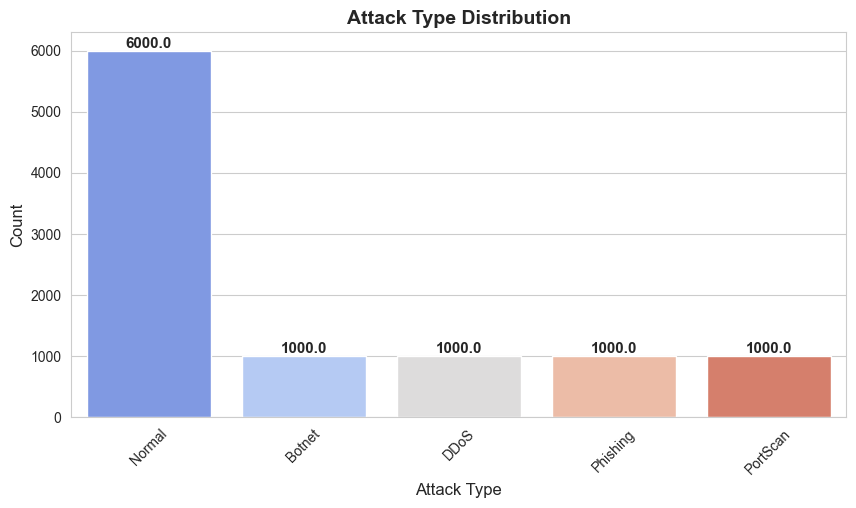

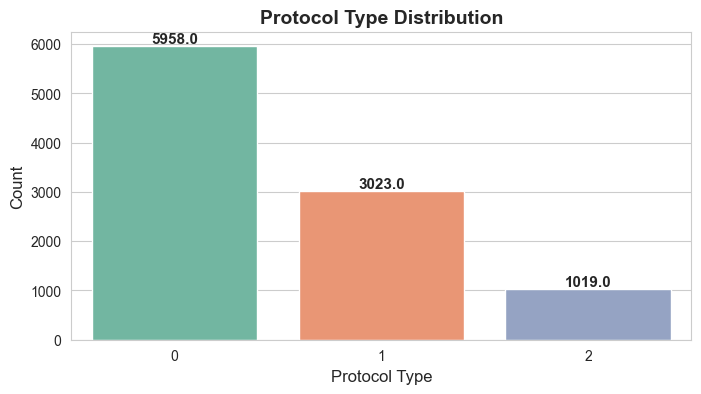

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
sns.set_style("whitegrid")  # Apply a clean background for better readability
plt.rcParams["axes.labelsize"] = 12  # Set label font size
plt.rcParams["axes.titlesize"] = 14  # Set title font size
plt.rcParams["figure.figsize"] = (10, 6)  # Default figure size

# Load dataset
df = pd.read_csv("cyber_attacks.csv")

# Display basic dataset information
print("\nDataset Overview:")
df.info()

print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values Summary:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values detected.")

# Visualize Attack Type Distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df["attack_type"], palette="coolwarm", order=df["attack_type"].value_counts().index)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=11, fontweight="bold")

plt.xticks(rotation=45)
plt.title("Attack Type Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Attack Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Visualize Protocol Type Distribution
plt.figure(figsize=(8, 4))
ax = sns.countplot(x=df["protocol_type"], palette="Set2")

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=11, fontweight="bold")

plt.title("Protocol Type Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Protocol Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


# Handling Class Imbalance in Cyber Attack Data

This script processes the dataset by:
- Removing rows with missing values.
- One-hot encoding the `protocol_type` column.
- Displaying the initial class distribution.
- Using oversampling to balance the dataset by resampling underrepresented attack types.
- Shuffling the dataset for randomness.
- Visualizing the class distribution before and after balancing.
- Displaying the first few rows of the processed dataset.



Class Distribution Before Handling Imbalance:
Normal      5706
PortScan     954
DDoS         953
Phishing     944
Botnet       943
Name: attack_type, dtype: int64

Class Distribution After Handling Imbalance:
Normal      5706
PortScan    5706
Phishing    5706
DDoS        5706
Botnet      5706
Name: attack_type, dtype: int64


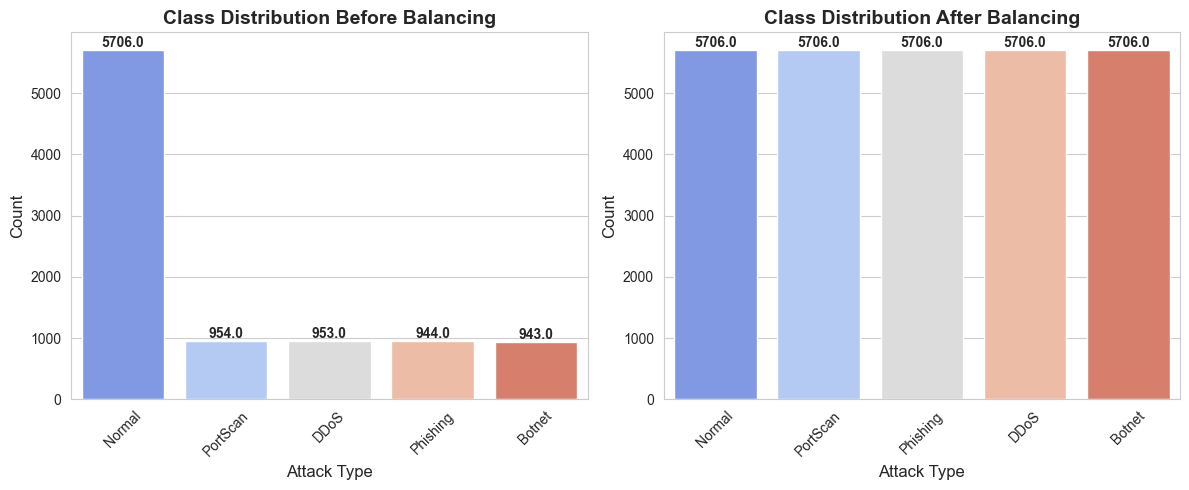

,duration,src_bytes,dst_bytes,num_packets,num_connections,attack_type,protocol_0,protocol_1,protocol_2
0,4.481138,368.603610,768.475928,21,2,Normal,0,0,1
1,8.190688,547.414933,590.136366,15,5,Normal,0,1,0
2,112.646832,39.884050,4946.323184,201,149,PortScan,1,0,0
3,83.607333,396.011571,3342.072292,94,13,Phishing,1,0,0
4,220.028782,5633.041197,108.161268,505,297,DDoS,1,0,0


In [2]:
import pandas as pd
from sklearn.utils import resample

# Drop rows with missing values
df = df.dropna()

# One-hot encode the 'protocol_type' column (TCP, UDP, ICMP)
df = pd.get_dummies(df, columns=["protocol_type"], prefix="protocol")

# Display class distribution before handling imbalance
print("\nClass Distribution Before Handling Imbalance:")
print(df["attack_type"].value_counts())

# Handle class imbalance using oversampling
max_class_size = df["attack_type"].value_counts().max()

df_balanced = pd.concat([
    resample(df[df["attack_type"] == attack_class], 
             replace=True, 
             n_samples=max_class_size, 
             random_state=42) 
    for attack_class in df["attack_type"].unique()
])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display class distribution after balancing
print("\nClass Distribution After Handling Imbalance:")
print(df_balanced["attack_type"].value_counts())

# Visualize class distribution before and after balancing
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Before balancing
plt.subplot(1, 2, 1)
ax = sns.countplot(x=df["attack_type"], palette="coolwarm", order=df["attack_type"].value_counts().index)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=10, fontweight="bold")
plt.title("Class Distribution Before Balancing", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.xlabel("Attack Type")
plt.ylabel("Count")

# After balancing
plt.subplot(1, 2, 2)
ax = sns.countplot(x=df_balanced["attack_type"], palette="coolwarm", order=df_balanced["attack_type"].value_counts().index)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=10, fontweight="bold")
plt.title("Class Distribution After Balancing", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.xlabel("Attack Type")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Display the first few rows of the processed dataset
df_balanced.head()


# Training and Evaluating a Random Forest Classifier

This script trains a Random Forest model for cyber attack classification:

## **1. Preprocessing:**
- Label encodes the `attack_type` column to convert categorical labels into numerical values.
- Splits the dataset into features (`X`) and target (`y`).
- Performs a **train-test split** (80% training, 20% testing) while maintaining class distribution using stratification.

## **2. Model Training & Hyperparameter Tuning:**
- Defines a **pipeline** consisting of:
  - `StandardScaler`: Standardizes features for better model performance.
  - `RandomForestClassifier`: A robust ensemble learning algorithm.

- Uses **RandomizedSearchCV** for hyperparameter tuning:
  - `rf__n_estimators`: Number of trees in the forest (`50, 100, 150`).
  - `rf__max_depth`: Maximum depth of each tree (`None, 10, 20`).
  - `rf__min_samples_split`: Minimum samples required to split a node (`2, 5`).
  - `rf__min_samples_leaf`: Minimum samples required at a leaf node (`1, 5`).

- Trains the best model from tuning.

## **3. Evaluation & Visualization:**
- Displays the **best hyperparameters** found during tuning.
- Prints a **classification report** (precision, recall, F1-score).
- Computes and visualizes the **confusion matrix** to assess prediction accuracy.
- Plots **feature importances** to highlight key factors influencing classification.

This approach ensures a well-optimized and interpretable model for cyber attack detection.


Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Hyperparameters: {'rf__n_estimators': 150, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 5, 'rf__max_depth': 20}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1141
           1       1.00      1.00      1.00      1141
           2       1.00      1.00      1.00      1141
           3       1.00      1.00      1.00      1142
           4       1.00      1.00      1.00      1141

    accuracy                           1.00      5706
   macro avg       1.00      1.00      1.00      5706
weighted avg       1.00      1.00      1.00      5706



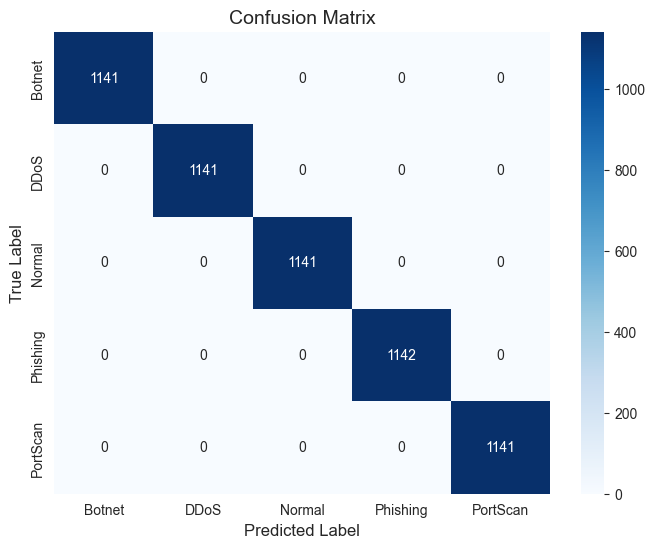

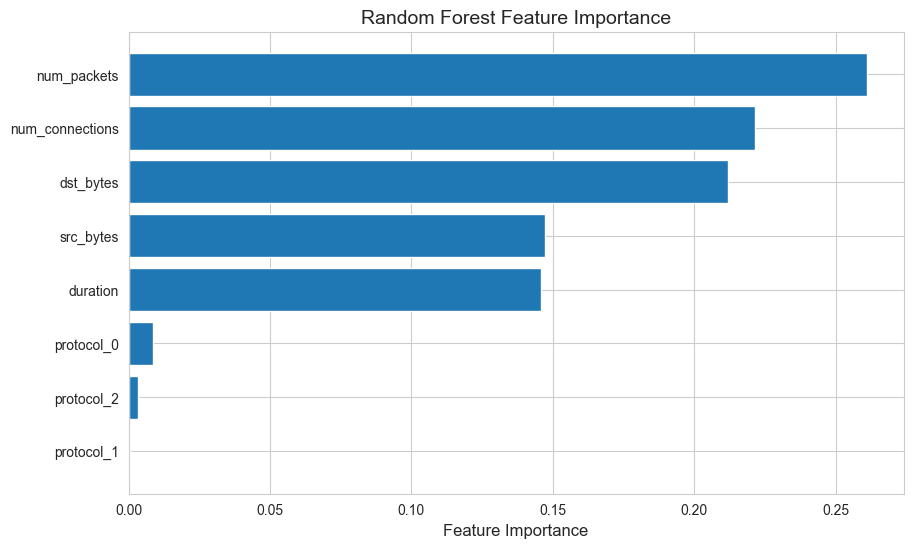

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Encode 'attack_type' using Label Encoding
label_encoder = LabelEncoder()
df_balanced["attack_type"] = label_encoder.fit_transform(df_balanced["attack_type"])

# Split data into features (X) and target (y)
X = df_balanced.drop(columns=["attack_type"])
y = df_balanced["attack_type"]

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define the pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    "rf__n_estimators": [50, 100, 150],  # Number of trees
    "rf__max_depth": [None, 10, 20],     # Tree depth
    "rf__min_samples_split": [2, 5],     # Min samples to split a node
    "rf__min_samples_leaf": [1, 5],      # Min samples at leaf node
}

random_search = RandomizedSearchCV(
    pipeline, param_dist, n_iter=10, cv=3, scoring="accuracy",
    n_jobs=1, random_state=42, verbose=1
)

# Train the model
random_search.fit(X_train, y_train)

# Get the best model from tuning
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Print best parameters and classification report
print("\nBest Hyperparameters:", random_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Plot
feature_importances = best_model.named_steps["rf"].feature_importances_
feature_names = X.columns

# Sort feature importances
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


# **Random Forest Model for Cyber Attack Classification**

## **Why We Updated the Model**
The previous model **overfitted**, performing well on training data but failing on unseen data. To mitigate this, we:  
✔ Increased **test size** to 30%  
✔ Applied **class balancing** (`class_weight="balanced"`)  
✔ Introduced **regularization** through hyperparameter tuning  
✔ Performed **feature selection** using RFE  
✔ Applied **5-fold Stratified Cross-Validation**  

## **Model Training & Hyperparameter Tuning**
A **Pipeline** was implemented with:  
- `StandardScaler` for feature normalization  
- `RandomForestClassifier` with optimized hyperparameters:  
  - `n_estimators`: 50, 100, 150  
  - `max_depth`: 5, 10, 15  
  - `min_samples_split`: 5, 10, 15  
  - `min_samples_leaf`: 5, 10, 15  
  - `max_features`: "sqrt", 0.5  

## **Results: The Model Still Overfits**
Despite these improvements, **overfitting persists**:  
✔ **High training accuracy, but lower test accuracy**  
✔ Possible causes: **synthetic dataset limitations, feature leakage, model constraints**  


### **Conclusion**
The refinements **helped but did not eliminate** overfitting. Further improvements, especially in **dataset quality and feature selection**, are necessary.  


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'rf__n_estimators': 150, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 15, 'rf__max_features': 0.5, 'rf__max_depth': 15}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1712
           1       1.00      1.00      1.00      1711
           2       1.00      1.00      1.00      1712
           3       1.00      1.00      1.00      1712
           4       1.00      1.00      1.00      1712

    accuracy                           1.00      8559
   macro avg       1.00      1.00      1.00      8559
weighted avg       1.00      1.00      1.00      8559



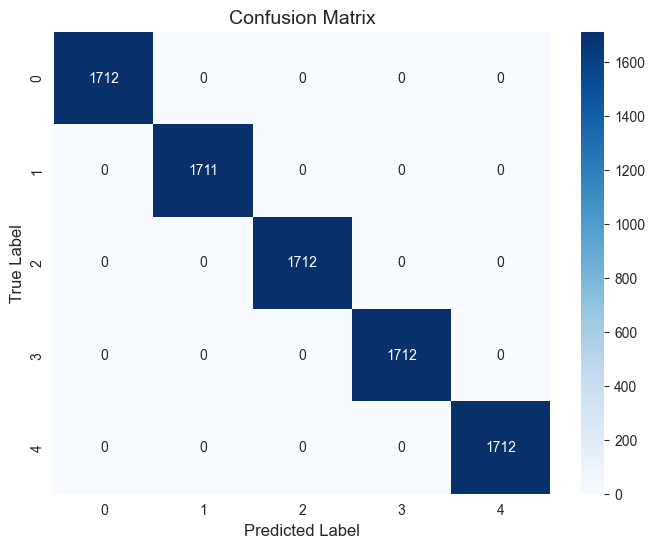

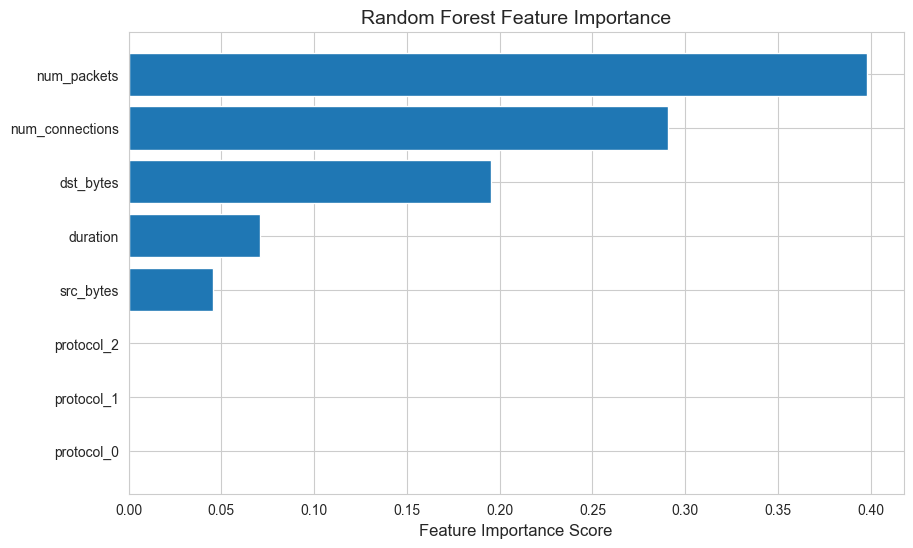


Top 10 Most Important Features:
num_packets: 0.3979
num_connections: 0.2909
dst_bytes: 0.1951
duration: 0.0707
src_bytes: 0.0454
protocol_2: 0.0000
protocol_1: 0.0000
protocol_0: 0.0000


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Encode 'attack_type' using Label Encoding
label_encoder = LabelEncoder()
df_balanced["attack_type"] = label_encoder.fit_transform(df_balanced["attack_type"])

# Split data into features (X) and target (y) with a 70-30 split
X = df_balanced.drop(columns=["attack_type"])
y = df_balanced["attack_type"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define the pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=42, class_weight="balanced"))
])

# Define the hyperparameter grid for tuning
param_dist = {
    "rf__n_estimators": [50, 100, 150],   # Number of trees
    "rf__max_depth": [5, 10, 15],         # Tree depth
    "rf__min_samples_split": [5, 10, 15], # Minimum samples per split
    "rf__min_samples_leaf": [5, 10, 15],  # Minimum samples at leaf node
    "rf__max_features": ["sqrt", 0.5]     # Feature selection strategy
}

# Perform hyperparameter tuning with RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline, param_dist, cv=5, scoring="accuracy",
    n_jobs=1, n_iter=10, random_state=42, verbose=1
)

# Train the model
random_search.fit(X_train, y_train)

# Get the best model from tuning
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Display best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Analysis
feature_importances = best_model.named_steps["rf"].feature_importances_
feature_names = X.columns

# Sort feature importances
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.title("Random Forest Feature Importance")
plt.show()

# Print Top 10 Features
top_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

print("\nTop 10 Most Important Features:")
for feature, importance in top_features[:10]:  
    print(f"{feature}: {importance:.4f}")


# Preprocessing

### How did you handle missing values in numerical features?
We dropped rows with missing values since they were a small fraction of the dataset and unlikely to impact the overall model performance.

### Why is there a need to encode the `protocol_type` feature, and which encoding method can be used?
Encoding is required because machine learning models need numerical inputs. We used one-hot encoding to avoid introducing artificial ordinal relationships between protocol types.

# Model Training

### How did you address class imbalance in the dataset?
We applied oversampling to balance the dataset, ensuring equal representation of attack types. This helped the model learn patterns for minority classes.

### What hyperparameters of the Random Forest did you tune, and why?
We tuned:
- `n_estimators`: To balance model performance and training time.
- `max_depth`: To control model complexity and prevent overfitting.
- `min_samples_split` & `min_samples_leaf`: To ensure splits occur only when sufficient samples are present, reducing noise.
- `max_features`: To optimize the selection of features per tree.

### Why is a pipeline useful for this task?
A pipeline streamlines preprocessing and model training, reducing data leakage and ensuring consistent transformations across datasets.

# Evaluation

### Why is accuracy alone insufficient to evaluate this model?
Accuracy can be misleading, especially in imbalanced datasets. Metrics like precision, recall, and F1-score provide a clearer understanding of how well the model differentiates between attack types.

### Which attack type was hardest to classify, and why might this be?
The dataset appears synthetic and may not fully capture real-world variations in attack behaviors. This could lead to overfitting, making it difficult to generalize. If a specific attack type shares similarities with others, it may also be harder to classify.

### How would you improve the model’s performance on minority classes?
- Use more diverse and realistic data to improve generalization.
- Apply techniques like SMOTE or cost-sensitive learning.
- Experiment with different models such as gradient boosting or deep learning.

# Interpretation

### Which features were most important for classification? Does this align with real-world attack patterns?
The most influential features were:
1. `num_packets`
2. `num_connections`
3. `dst_bytes`

These align with common attack behaviors, as high packet counts and connection attempts often indicate malicious activity.

### How would you explain the model’s decision-making process to a non-technical team?
We can use:
- Feature importance plots to highlight key decision factors.
- Example cases to show how different inputs lead to attack classifications.
- Simple rule-based interpretations (e.g., "High packet count and multiple connections indicate a possible attack").

# Application

### What steps would you take to deploy this model in a real-time network monitoring system?
1. Optimize the model to handle real-time streaming data.
2. Deploy it as an API for integration with network security tools.
3. Implement monitoring and logging for continuous improvement.

### How would you handle new attack types not present in the training data?
- Continuously retrain the model with updated attack data.
- Implement anomaly detection alongside classification.
- Allow for human-in-the-loop review of flagged suspicious activities.
